In [30]:
import pandas as pd 
import numpy as np

In [2]:
data = pd.read_parquet('jane-street-real-time-market-data-forecasting/train.parquet/partition_id=5/part-0.parquet')

In [31]:
data['weight'].unique().shape

(5525,)

In [32]:
data

,date_id,time_id,symbol_id,weight,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,...,responder_3,responder_4,responder_5,responder_6,responder_7,responder_8,mean_responder_0,std_responder_0,mean_responder_6,std_responder_6
0,850,0,0,2.087724,-0.276877,-2.385324,-1.086325,0.049463,3.427029,-4.671824,...,0.803933,0.725200,0.141694,1.461546,0.779843,0.404129,-0.002061,0.217738,-0.002622,0.600081
1,850,0,1,3.752097,-0.168178,-2.161023,-0.511679,0.192425,3.162096,-4.386098,...,0.396958,1.208221,-1.016843,0.789595,1.251492,-1.701416,-0.006335,0.191356,0.078150,0.561583
2,850,0,2,1.225099,-0.520426,-1.718115,-0.817358,-0.270528,3.314825,-2.578923,...,-2.395850,-1.057062,-3.009765,-2.848316,-0.974728,-5.000000,-0.034364,0.389997,0.031286,1.755031
3,850,0,3,1.467042,-0.061985,-1.818735,-0.990254,0.274284,3.810929,-1.111770,...,-0.096906,-0.263321,0.094231,-0.749164,-0.691085,-0.089415,0.008323,0.507518,-0.025776,0.306013
4,850,0,5,3.144071,-0.321442,-1.964041,-0.409452,-0.343893,3.069664,-2.929145,...,-0.440090,0.145323,-0.967585,-0.882600,0.131690,-1.548052,0.000183,0.187398,0.064633,0.531254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5348195,1019,967,34,2.181158,-0.473125,-0.294313,-0.504890,-0.574804,-0.264234,0.217472,...,0.475612,0.228412,1.347465,1.109051,0.413083,1.210147,-0.043912,0.288220,0.195992,0.830436
5348196,1019,967,35,2.678406,-0.889140,0.036783,-0.839517,-0.794992,-0.218065,0.217401,...,-0.118971,-0.029297,0.238163,0.038644,0.051222,0.058214,-0.029827,0.338465,0.000571,0.823606
5348197,1019,967,36,3.784245,-0.828614,0.229586,-0.925098,-0.406671,-0.507831,0.142539,...,-0.218017,-0.151008,0.176655,-0.019967,0.023102,-0.071703,-0.013629,0.457842,-0.011769,0.453240
5348198,1019,967,37,1.983531,-0.802500,0.258006,-0.122918,-0.752607,-0.779516,0.200904,...,0.171605,0.106017,0.211023,0.137134,0.064562,0.313121,0.009666,0.248170,-0.090307,0.521713


In [33]:
import pandas as pd

# 데이터가 data라고 가정했을 때:
# 만약 특정 컬럼에 대해서만 계산하고 싶다면:
# 예를 들어 'responder_6' 컬럼에 대해서만 계산
# 결과를 데이터프레임에 새로운 컬럼으로 추가하고 싶다면:
data['mean_responder_0'] = data.groupby(['date_id', 'symbol_id'])['responder_0'].transform('mean')
data['std_responder_0'] = data.groupby(['date_id', 'symbol_id'])['responder_0'].transform('std')

data['mean_responder_6'] = data.groupby(['date_id', 'symbol_id'])['responder_6'].transform('mean')
data['std_responder_6'] = data.groupby(['date_id', 'symbol_id'])['responder_6'].transform('std')

In [34]:
data.loc[:, ['date_id', 'symbol_id', 'weight', 'mean_responder_0', 'std_responder_0', 'mean_responder_6', 'std_responder_6']].groupby(['date_id', 'symbol_id']).last()

weight  mean_responder_0  std_responder_0  \
date_id symbol_id                                                
850     0          2.087724         -0.002061         0.217738   
        1          3.752097         -0.006335         0.191356   
        2          1.225099         -0.034364         0.389997   
        3          1.467042          0.008323         0.507518   
        5          3.144071          0.000183         0.187398   
...                     ...               ...              ...   
1019    34         2.181158         -0.043912         0.288220   
        35         2.678406         -0.029827         0.338465   
        36         3.784245         -0.013629         0.457842   
        37         1.983531          0.009666         0.248170   
        38         2.313141          0.011030         0.249317   

                   mean_responder_6  std_responder_6  
date_id symbol_id                                     
850     0                 -0.002622         0.600081  
        1                  0.078150         0.561583  
        2                  0.031286         1.755031  
        3                 -0.025776         0.306013  
        5                  0.064633         0.531254  
...                             ...              ...  
1019    34                 0.195992         0.830436  
        35                 0.000571         0.823606  
        36                -0.011769         0.453240  
        37                -0.090307         0.521713  
        38                 0.014215         0.470225  

[5525 rows x 5 columns]

In [35]:
result_df = (data.loc[:, ['date_id', 'symbol_id', 'weight', 'mean_responder_0', 'std_responder_0', 'mean_responder_6', 'std_responder_6']]
             .groupby(['date_id', 'symbol_id'])
             .last()
             .reset_index())

In [36]:
result_df["mean/std_0"] = result_df['mean_responder_6']/result_df['std_responder_6']
result_df["mean/std_6"] = result_df['mean_responder_6']/result_df['std_responder_6']

In [42]:
result_df.corr().loc['weight']

date_id             0.179692
symbol_id          -0.380477
weight              1.000000
mean_responder_0    0.010062
std_responder_0    -0.174315
mean_responder_6   -0.003600
std_responder_6    -0.214209
mean/std_0         -0.023877
mean/std_6         -0.023877
Name: weight, dtype: float64

기울기 (slope): -0.1933
절편 (intercept): 2.1066
R-squared (R²): 0.0006
p-value: 7.5957e-02
표준오차 (standard error): 0.1089


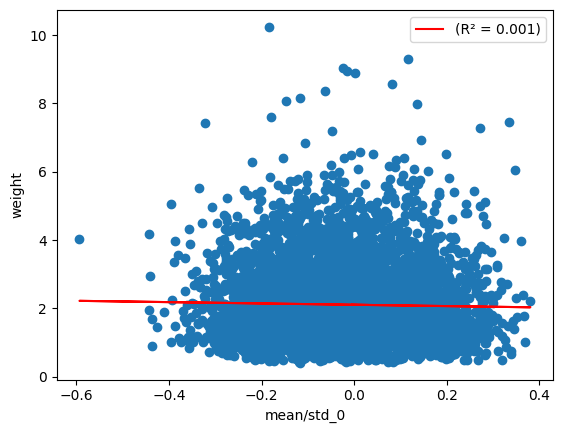

In [39]:
import matplotlib.pyplot as plt
from scipy import stats

feature = "mean/std_0"

# 산점도 그리기
plt.scatter(result_df[feature], result_df['weight'])

# 회귀선 계산
slope, intercept, r_value, p_value, std_err = stats.linregress(result_df[feature], result_df['weight'])
line = slope * result_df[feature] + intercept

# 회귀선 그리기
plt.plot(result_df[feature], line, color='red', label=f'(R² = {r_value**2:.3f})')
plt.xlabel(feature)
plt.ylabel('weight')
plt.legend()

# 회귀 계수와 통계값 출력
print(f'기울기 (slope): {slope:.4f}')
print(f'절편 (intercept): {intercept:.4f}')
print(f'R-squared (R²): {r_value**2:.4f}')
print(f'p-value: {p_value:.4e}')
print(f'표준오차 (standard error): {std_err:.4f}')

plt.show()

기울기 (slope): 0.3119
절편 (intercept): 2.1122
R-squared (R²): 0.0001
p-value: 4.5461e-01
표준오차 (standard error): 0.4171


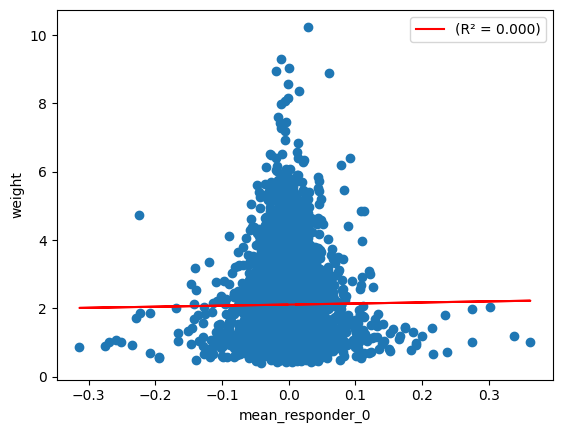

In [40]:
import matplotlib.pyplot as plt
from scipy import stats

feature = "mean_responder_0"

# 산점도 그리기
plt.scatter(result_df[feature], result_df['weight'])

# 회귀선 계산
slope, intercept, r_value, p_value, std_err = stats.linregress(result_df[feature], result_df['weight'])
line = slope * result_df[feature] + intercept

# 회귀선 그리기
plt.plot(result_df[feature], line, color='red', label=f'(R² = {r_value**2:.3f})')
plt.xlabel(feature)
plt.ylabel('weight')
plt.legend()

# 회귀 계수와 통계값 출력
print(f'기울기 (slope): {slope:.4f}')
print(f'절편 (intercept): {intercept:.4f}')
print(f'R-squared (R²): {r_value**2:.4f}')
print(f'p-value: {p_value:.4e}')
print(f'표준오차 (standard error): {std_err:.4f}')

plt.show()

기울기 (slope): -0.7189
절편 (intercept): 2.4050
R-squared (R²): 0.0304
p-value: 6.0301e-39
표준오차 (standard error): 0.0546


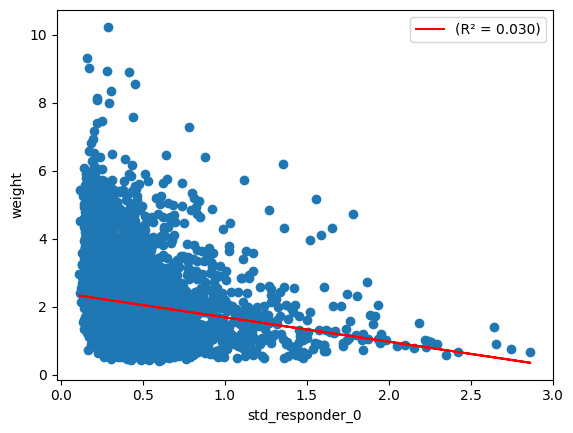

In [41]:
import matplotlib.pyplot as plt
from scipy import stats

feature = "std_responder_0"

# 산점도 그리기
plt.scatter(result_df[feature], result_df['weight'])

# 회귀선 계산
slope, intercept, r_value, p_value, std_err = stats.linregress(result_df[feature], result_df['weight'])
line = slope * result_df[feature] + intercept

# 회귀선 그리기
plt.plot(result_df[feature], line, color='red', label=f'(R² = {r_value**2:.3f})')
plt.xlabel(feature)
plt.ylabel('weight')
plt.legend()

# 회귀 계수와 통계값 출력
print(f'기울기 (slope): {slope:.4f}')
print(f'절편 (intercept): {intercept:.4f}')
print(f'R-squared (R²): {r_value**2:.4f}')
print(f'p-value: {p_value:.4e}')
print(f'표준오차 (standard error): {std_err:.4f}')

plt.show()